#Stock market Predictions.

In [9]:
 !pip install pandas-datareader;

In [10]:
import pandas_datareader as pdr;
import datetime;
import pandas as pd;

#Showing the Values of the Date by setting up of the Data.
start=datetime.datetime(2018,1,1);
end=datetime.datetime(2024,7,20);

#Printing the Satrt and the end date.
print("\n 1. Starting Date of the Market: ",start);
print("\n 2. Ending Date of the Market: ",end);


 1. Starting Date of the Market:  2018-01-01 00:00:00

 2. Ending Date of the Market:  2024-07-20 00:00:00


In [11]:
stock=['TSLA'];
data=pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols');
data.head();

In [12]:
#Reset the Values of the Index.
newData=data.reset_index();
newData.head();

In [14]:
newData.to_csv('/content/Tesla_stock_2018_to_2024.csv')

<Axes: title={'center': 'Tesla stock price'}, xlabel='Date', ylabel='Price'>

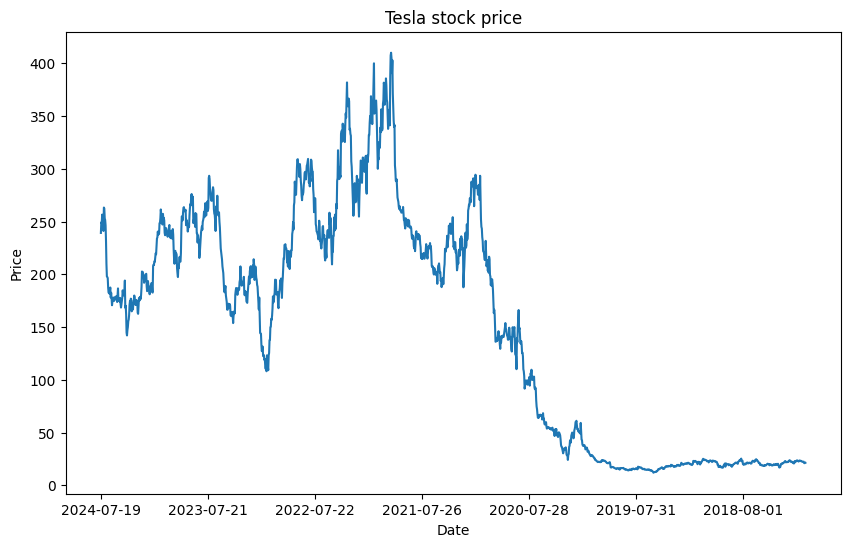

In [16]:
import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
Tsla_data = pd.read_csv('/content/Tesla_stock_2018_to_2024.csv')

# set the date as the index
Tsla_data.set_index('Date',inplace=True)
Tsla_data.head()
# and then sperate the close price
close_price = Tsla_data['Close']
# then plot the close price
close_price.plot(xlabel='Date',ylabel='Price',label='Tsla',title='Tesla stock price',figsize=(10,6))



<Axes: title={'center': 'Tesla stock price'}, xlabel='Date', ylabel='Price'>

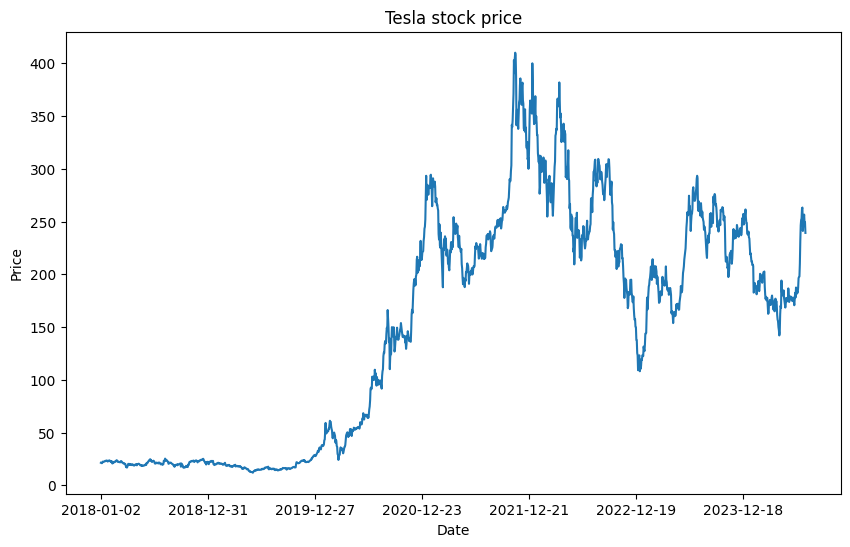

In [18]:
import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
Tsla_data = pd.read_csv('/content/Tesla_stock_2018_to_2024.csv')

# set the date as the index
Tsla_data.set_index('Date',inplace=True);
Tsla_data.sort_index(ascending=True,inplace=True);
Tsla_data.head()
# and then sperate the close price
close_price = Tsla_data['Close']
# then plot the close price
close_price.plot(xlabel='Date',ylabel='Price',label='Tsla',title='Tesla stock price',figsize=(10,6))

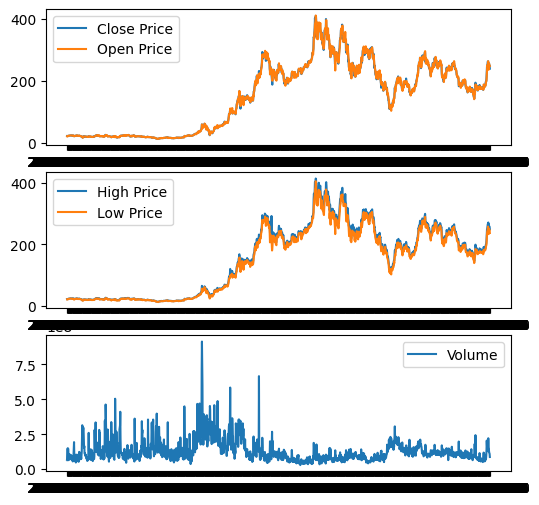

In [26]:
#We, meed to show the values of the Subplot of data: 'SYMBOLS','CLOSE','HIGH','LOW','OPEN'.
import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np;

#Now, we have to subplot the values of the graph.
plt.figure(1,figsize=(6,6));

plt.subplot(3,1,1);
plt.plot(Tsla_data['Close'],label='Close Price');
plt.plot(Tsla_data['Open'],label='Open Price');
plt.legend();

plt.subplot(3,1,2);
plt.plot(Tsla_data['High'],label='High Price');
plt.plot(Tsla_data['Low'],label='Low Price');
plt.legend();

plt.subplot(3,1,3);
plt.plot(Tsla_data['Volume'],label='Volume');
plt.legend();

#(SMA)-Simple Moving Average - On, Closing Price.

In [30]:
#Showing the Values of the Moving Averages,
Tsla_data.head();

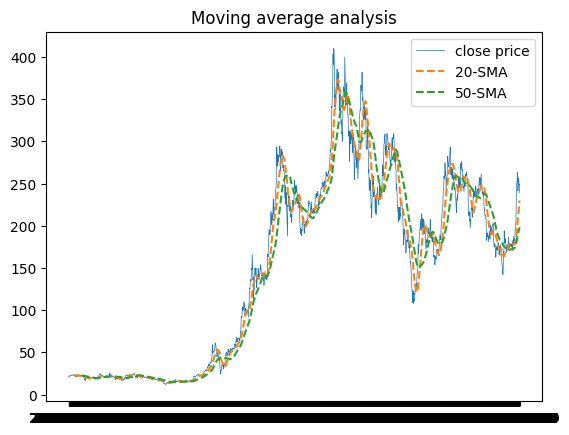

In [33]:
#Now, Calculating the Values of the Moving Average.
# calulate the moving average
Tsla_data['SMA_20'] = Tsla_data['Close'].rolling(20).mean()
Tsla_data['SMA_50'] = Tsla_data['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(Tsla_data['Close'],label='close price',linewidth=0.5)
plt.plot(Tsla_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(Tsla_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()




# ta- is a Library (Technical Indicator Calculator), to calculate Automatically!

--> Graph is Narrow: It indicates the Descresing Volatility , potentially presceding the period of Significant Price Movement.

--> If Brand is Widenning: It Increases it in the Volatility and Increase the Large Swings.

--> If it Touches the Uper-Bound: then this is a Over-Bot Situation.

--> If it Tiuches the Lower-Bound: then this is iver-Sold Situation.

In [34]:
!pip install ta;

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=fcca1115a825d0f811705b39694ec997add8327981b6d93c204f7809c25c3e33
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


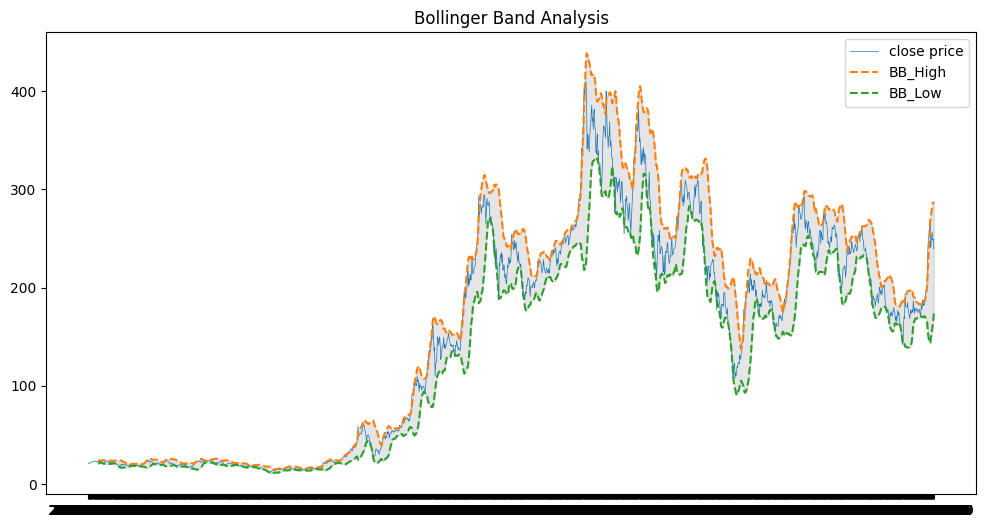

In [42]:
import ta;
#Bollinger Band.
bb = ta.volatility.BollingerBands(Tsla_data['Close'], window=20, window_dev=2) # Changed 'windows' to 'window'
Tsla_data['BB_High'] = bb.bollinger_hband()
Tsla_data['BB_Low'] = bb.bollinger_lband() # Corrected to 'bollinger_lband' for lower band
plt.figure(1,(12,6))
plt.plot(Tsla_data['Close'],label='close price',linewidth=0.5)
plt.plot(Tsla_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(Tsla_data['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(Tsla_data.index,Tsla_data['BB_High'],Tsla_data['BB_Low'],alpha=0.2,color='gray')
plt.title("Bollinger Band Analysis");
plt.legend();

#RSI-(Relative Strength Index).

--> The 'RSI' is a Momentum Occilator that measures the speed and change of price movements. It Ranges from (0-100).

--> With the Values above > 70 Indicates, the (OverBought Conditions).

--> And, Values of Below < 30 Indicates the (OverSold Conditions).

In [43]:
Tsla_data['RSI'] = ta.momentum.RSIIndicator(Tsla_data['Close'], window=14);
Tsla_data.head();

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
Date,,,,,,,,,,,,
2024-07-15,4,TSLA,252.64,265.60,251.7300,255.97,146912920,216.7975,192.8150,279.557930,154.037070,70.754312
2024-07-16,3,TSLA,256.56,258.62,245.8001,255.31,126332470,220.7250,194.3460,283.114805,158.335195,72.021860
2024-07-17,2,TSLA,248.50,258.47,246.1820,252.73,115584810,223.7780,195.6922,285.324052,162.231948,65.715167
2024-07-18,1,TSLA,249.23,257.14,247.2000,251.09,110869037,226.9965,196.9816,286.772082,167.220918,66.005515
2024-07-19,0,TSLA,239.20,249.44,236.8300,247.79,87403903,229.8780,198.2094,286.065007,173.690993,58.655507


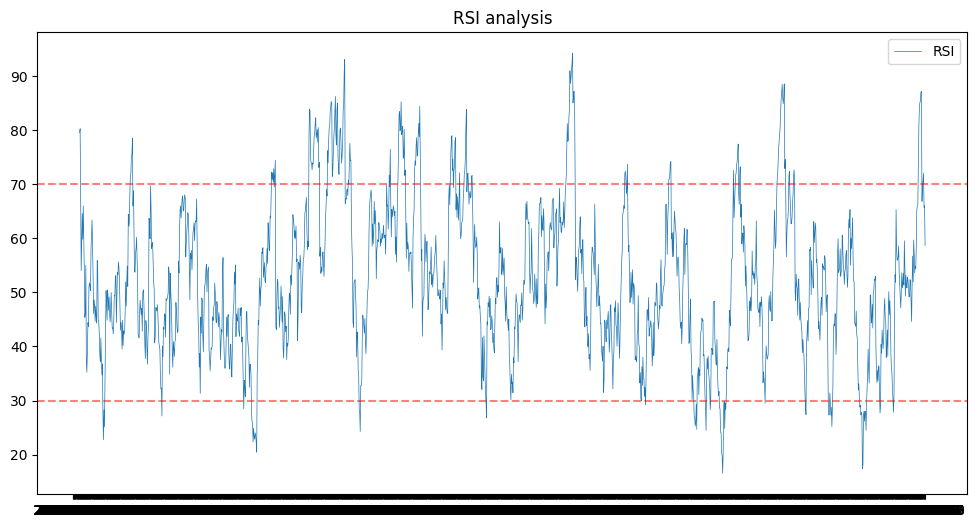

In [46]:
# relative strength index
Tsla_data['RSI'] = ta.momentum.rsi(Tsla_data['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(Tsla_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend();
Tsla_data.tail();

In [47]:
# prompt: save it in the new csv file
Tsla_data.to_csv('/content/Tesla_stock_2018_to_2024_with_indicators.csv')

#Same Operation of Prediction Performed on Infosys Service Based Companies.

#Infosys - INFY.

In [52]:
import pandas_datareader as pdr;
import datetime;
import pandas as pd;

#Showing the Values of the Date by setting up of the Data.
start=datetime.datetime(2018,1,1);
end=datetime.datetime(2024,7,20);

#Printing the Satrt and the end date.
print("\n 1. Starting Date of the Market: ",start);
print("\n 2. Ending Date of the Market: ",end);


 1. Starting Date of the Market:  2018-01-01 00:00:00

 2. Ending Date of the Market:  2024-07-20 00:00:00


In [53]:
stock=['INFY'];
data=pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols');
data.head();

In [54]:
#Reset the Values of the Index.
newData=data.reset_index();
newData.head();

In [55]:
newData.to_csv('/content/INFOSYS_stock_2018_to_2024 (1).csv');

<Axes: title={'center': 'Infosys Stock Price'}, xlabel='Date', ylabel='Price'>

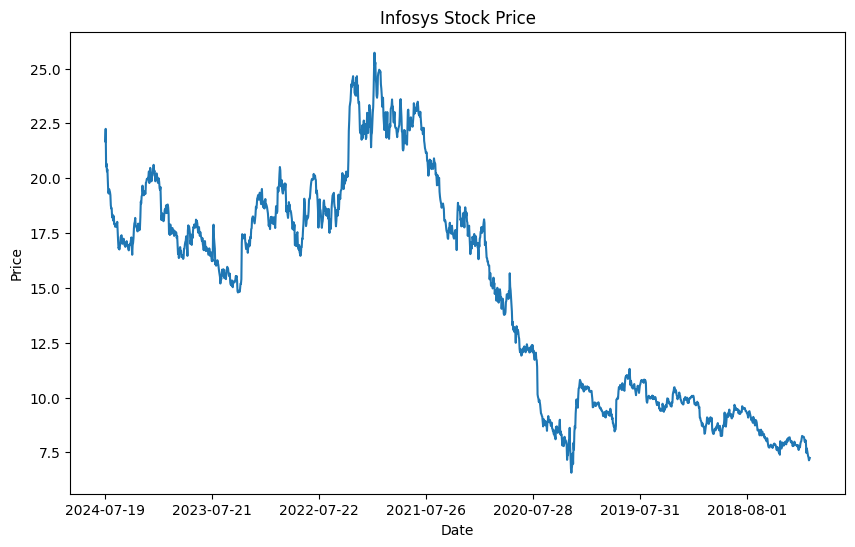

In [57]:
import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
INFY_data = pd.read_csv('/content/INFOSYS_stock_2018_to_2024 (1).csv')

# set the date as the index
INFY_data.set_index('Date',inplace=True)
INFY_data.head()
# and then sperate the close price
close_price = Tsla_data['Close']
# then plot the close price
close_price.plot(xlabel='Date',ylabel='Price',label='INFY',title='Infosys Stock Price',figsize=(10,6))

<Axes: title={'center': 'Infosys Stock Price'}, xlabel='Date', ylabel='Price'>

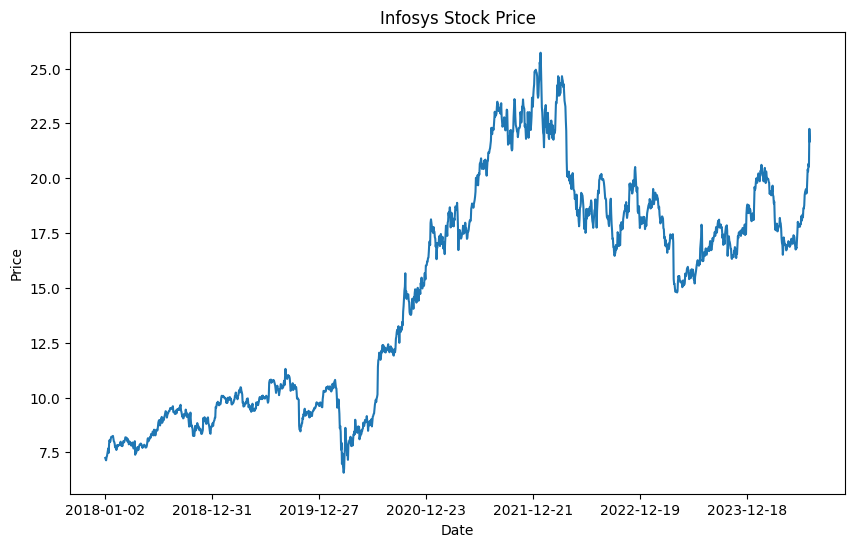

In [59]:
import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
INFY_data = pd.read_csv('/content/INFOSYS_stock_2018_to_2024 (1).csv')

# set the date as the index
INFY_data.set_index('Date',inplace=True)
INFY_data.sort_index(ascending=True,inplace=True)
INFY_data.head()
# and then sperate the close price
close_price = INFY_data['Close']
# then plot the close price
close_price.plot(xlabel='Date',ylabel='Price',label='INFY',title='Infosys Stock Price',figsize=(10,6))

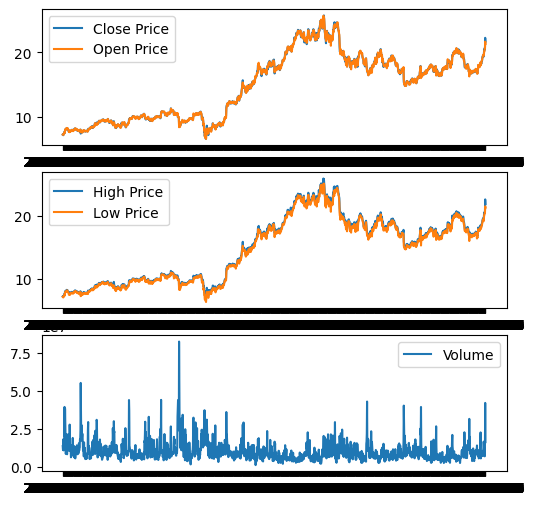

In [60]:
#We, meed to show the values of the Subplot of data: 'SYMBOLS','CLOSE','HIGH','LOW','OPEN'.
import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np;

#Now, we have to subplot the values of the graph.
plt.figure(1,figsize=(6,6));

plt.subplot(3,1,1);
plt.plot(INFY_data['Close'],label='Close Price');
plt.plot(INFY_data['Open'],label='Open Price');
plt.legend();

plt.subplot(3,1,2);
plt.plot(INFY_data['High'],label='High Price');
plt.plot(INFY_data['Low'],label='Low Price');
plt.legend();

plt.subplot(3,1,3);
plt.plot(INFY_data['Volume'],label='Volume');
plt.legend();

# >> Showing the Values of the Moving Averages. ON INFOSYS.

In [62]:
#Showing the Movinf Averages.
INFY_data.head();

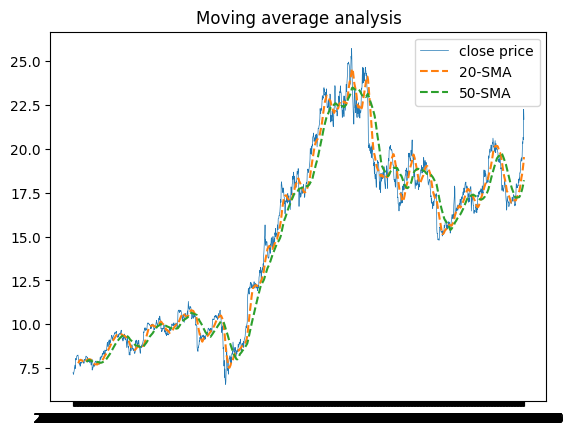

In [63]:
#Now, Calculating the Values of the Moving Average.
# calulate the moving average
INFY_data['SMA_20'] = INFY_data['Close'].rolling(20).mean()
INFY_data['SMA_50'] = INFY_data['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(INFY_data['Close'],label='close price',linewidth=0.5)
plt.plot(INFY_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(INFY_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()

#Relative Strength Index.

In [64]:
INFY_data['RSI'] = ta.momentum.RSIIndicator(INFY_data['Close'], window=14);
INFY_data.head();

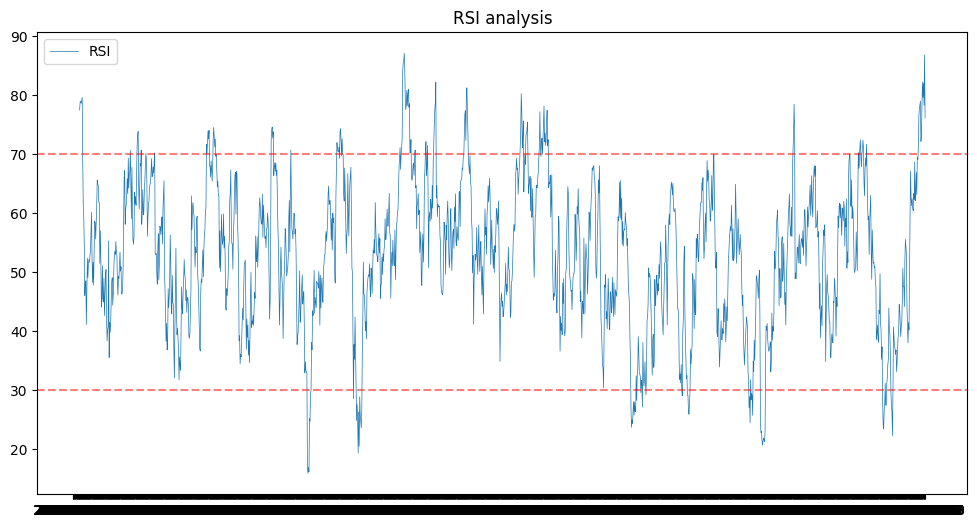

In [65]:
# relative strength index
INFY_data['RSI'] = ta.momentum.rsi(INFY_data['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(INFY_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend();
Tsla_data.tail();

In [66]:
# prompt: NOW save the infy file in new csv file

INFY_data.to_csv('/content/Infosys_stock_2018_to_2024_with_indicators.csv')


=============================== Infosys -INFY (PREDICTIONS). ==========================